In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype
from datetime import datetime
from Utilities import T_test
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
df = pd.read_csv('./0803Data/analysis_data.csv',encoding='utf-16')

### 선행 연구에서 유의미하게 나타났던 Feature
#### Numerical

1.	Duration of project(1-60 days with average 30 days)
2.	The goal amount
3.	The number of images  
4.	The presence of videos
5.	The duration of videos
6.  The number of update 

In [3]:
# http://www.databaser.net/moniwiki/wiki.php/%EC%9D%B4%EC%83%81%EC%B9%98%EC%A0%9C%EA%B1%B0%EB%B0%A9%EB%B2%95
# outlier-제거
def find_outlier_treshold(df,column):
    summary = df[column].describe()
    Q1 = summary['25%']
    Q3 = summary['75%']
    IQR = Q3 - Q1    
    return Q1, Q3, IQR

def check_outlier(value,Q1,Q3,IQR):
    if (value < Q1 - (1.5 * IQR)) or (value > Q3 + (1.5 * IQR)):
        return True
    else:
        return False

def filter_outlier(df,column):
    Q1, Q3, IQR = find_outlier_treshold(df,column)
    value_list = df[column].tolist()
    removed_outlier_list = list(filter(lambda x: check_outlier(x, Q1, Q3, IQR) != True, value_list))
    diff = len(value_list) - len(removed_outlier_list)
    print('Number of filtered value : {0}, Removed number of value : {1}'.format(len(removed_outlier_list),diff))
    
    # column이름
    filtered_df = df[df[column].isin(removed_outlier_list)]
    
#     new_column = 'filtered_' + column
#     removed_outlier_df = pd.DataFrame({new_column : removed_outlier_list})
    return filtered_df

In [5]:
filter_outlier(df,'project_goal').head()

Number of filtered value : 2213, Removed number of value : 283


,project_id,project_launched_at,project_deadline,project_goal,project_category,date,days_to_go,pledged,options_number,title_count,...,diff,success,backer1,backer2,backer3,ratio1,ratio2,ratio3,top_category,super_category
0,1000414645,1560292936,1562884936,10000.0,Science Fiction,1.562814e+09,19.0,20139.0,12.0,35.0,...,2.0,1,13.0,17.0,25.0,37.730000,39.180000,44.94,Film & Video,Film
1,1002877193,1559689942,1562281942,3000.0,Video Games,1.562213e+09,19.0,3217.0,9.0,13.0,...,2.0,1,127.0,149.0,153.0,48.733333,56.233333,58.40,Games,Games
2,1002950518,1559343638,1561935638,500.0,Comics,1.561874e+09,17.0,1306.0,11.0,47.0,...,2.0,1,15.0,19.0,22.0,77.600000,89.800000,105.80,Comics,Comics & Illustartion
3,1003129771,1560307671,1564627671,5000.0,Shorts,1.564618e+09,2.0,14.0,2.0,43.0,...,1.0,0,1.0,1.0,1.0,0.000000,0.000000,0.00,Film & Video,Film
4,1004145683,1561755322,1564347322,250.0,Tabletop Games,1.564285e+09,17.0,867.0,7.0,20.0,...,-1.0,1,5.0,7.0,8.0,3.600000,54.000000,71.20,Games,Games


In [6]:
df['success'] = df['success'].apply(lambda x : 'success' if x == 1 else 'Fail')

In [7]:
project_goal = filter_outlier(df,'project_goal')
project_goal.groupby(['success'])['project_goal'].describe()

Number of filtered value : 2213, Removed number of value : 283


,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,999.0,11149.521522,10277.989137,1.0,3000.0,8000.0,15000.0,45000.0
success,1214.0,7598.211697,8536.013599,1.0,1585.0,5000.0,10000.0,45000.0


In [8]:
T_test.T_test(project_goal,'success','project_goal')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=41.608938060086054, pvalue=1.3651475630882978e-10)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=-8.87967495281568, pvalue=1.3559090006205035e-18)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

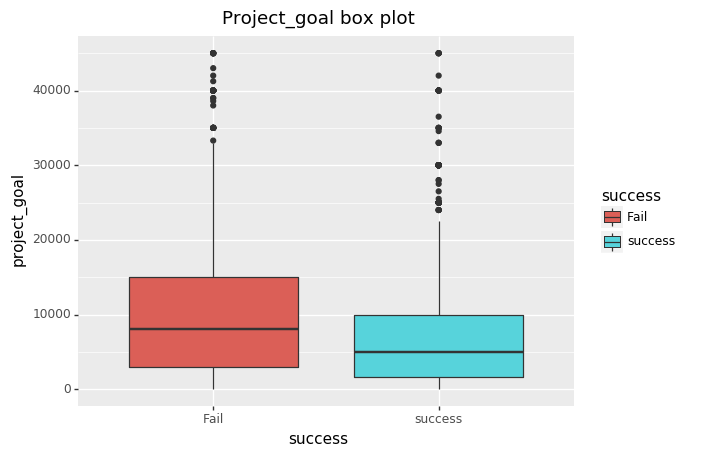

<ggplot: (283946935)>

In [9]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
ggplot(project_goal, aes(x='success', y='project_goal')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Project_goal box plot')
#     + facet_wrap('~Success')

<Figure size 432x288 with 0 Axes>

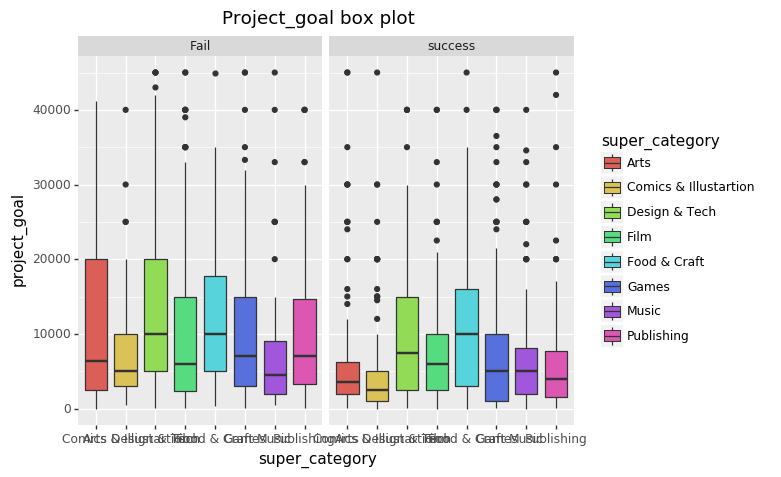

<ggplot: (-9223372036572110371)>

In [10]:
fig = plt.figure()
# graph 객체 생성
ggplot(project_goal, aes(x='super_category', y='project_goal')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Project_goal box plot') \
    + facet_wrap('~success')

In [11]:
df.groupby(['success'])['content_img_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,1230.0,11.812195,14.123817,0.0,1.0,7.0,17.0,118.0
success,1266.0,19.372038,19.991219,0.0,5.0,13.0,28.0,142.0


In [12]:
T_test.T_test(df,'success','content_img_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=65.5325820328145, pvalue=8.839736677671316e-16)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=10.88351778397947, pvalue=5.526458568858185e-27)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

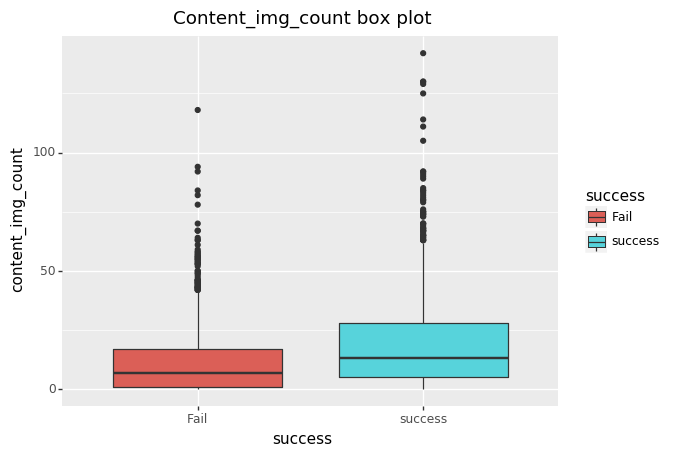

<ggplot: (-9223372036571789575)>

In [13]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='content_img_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Content_img_count box plot')

<Figure size 432x288 with 0 Axes>

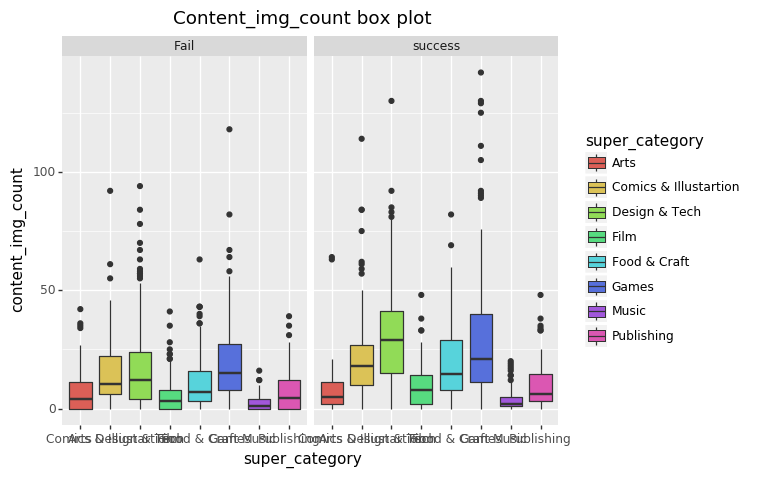

<ggplot: (282991087)>

In [14]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='content_img_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Content_img_count box plot') \
    + facet_wrap('~success')

In [15]:
df.groupby(['success'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,1230.0,32.695935,10.375469,7.0,30.0,30.0,34.0,60.0
success,1266.0,28.755924,7.936586,7.0,26.0,30.0,30.0,60.0


In [16]:
T_test.T_test(df,'success','duration')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=17.877159532359336, pvalue=2.4411968258253903e-05)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=-10.674347952961394, pvalue=4.85225925914887e-26)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

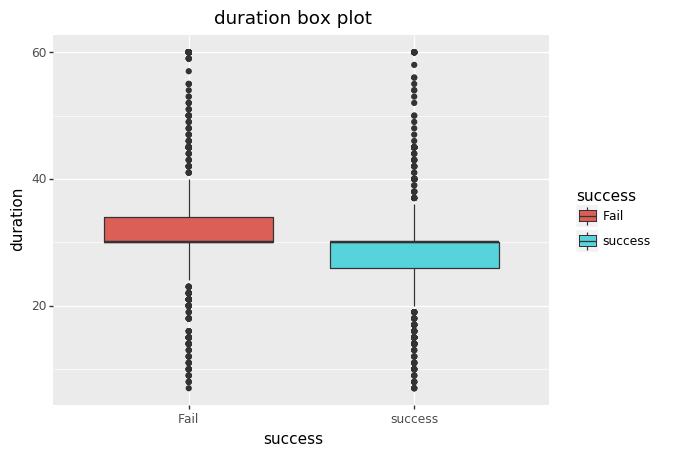

<ggplot: (283403640)>

In [17]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='duration')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('duration box plot')

<Figure size 432x288 with 0 Axes>

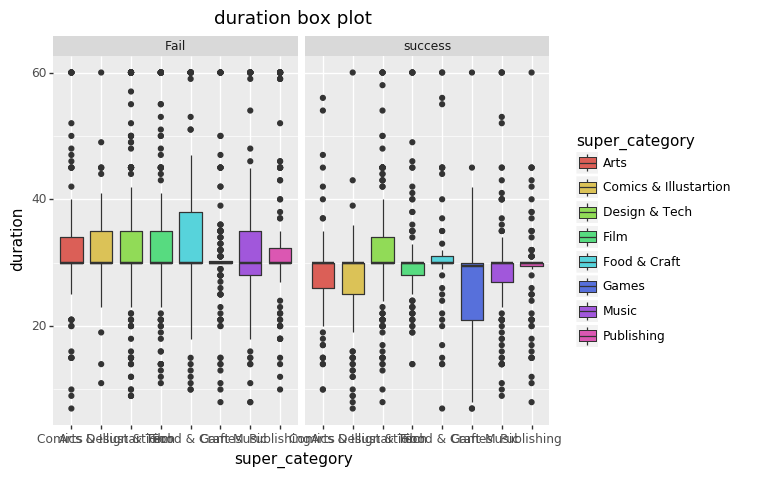

<ggplot: (283403766)>

In [18]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~success')

#### Textual
1.	Project title
2.	Project description
3.	FAQs 
=>  Converted into numerical values by counting the number of words.

In [19]:
df.groupby(['success'])['title_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,1230.0,34.204065,16.188570,4.0,20.0,34.0,48.0,60.0
success,1266.0,36.763033,15.712559,4.0,23.0,37.0,51.0,60.0


In [20]:
T_test.T_test(df,'success','title_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=2.010740509158457, pvalue=0.15631399538954535)
=> H0 : 두 집단의 분산은 같다
---------------------------------------------
T-test
Ttest_indResult(statistic=4.005845273349956, pvalue=6.361068293451448e-05)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

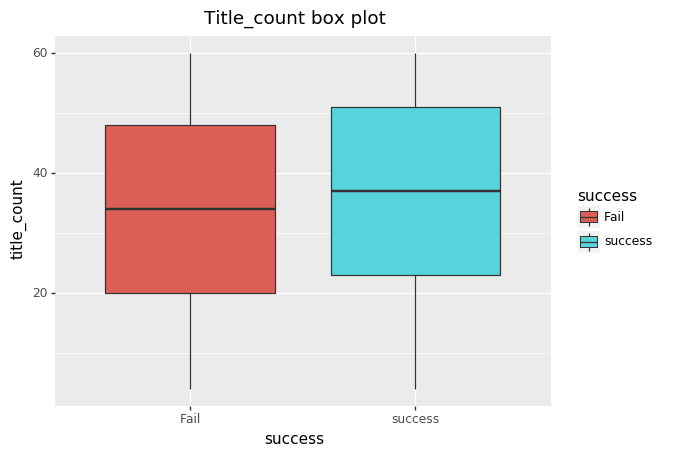

<ggplot: (284329981)>

In [22]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='title_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Title_count box plot')

<Figure size 432x288 with 0 Axes>

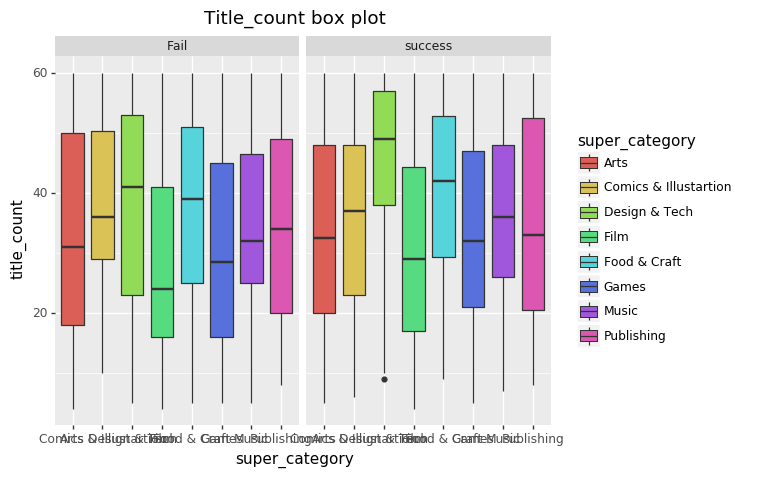

<ggplot: (283551075)>

In [23]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='title_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Title_count box plot') \
    + facet_wrap('~success')

In [24]:
df.groupby(['success'])['content_text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,1230.0,4935.361789,3970.165598,189.0,2226.0,3901.5,6312.50,30402.0
success,1266.0,6363.994471,4551.523001,193.0,3117.0,5285.5,8132.25,31855.0


In [25]:
T_test.T_test(df,'success','content_text_length')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=19.851550723511775, pvalue=8.738861070009438e-06)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=8.347155121252548, pvalue=1.1430698435342845e-16)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

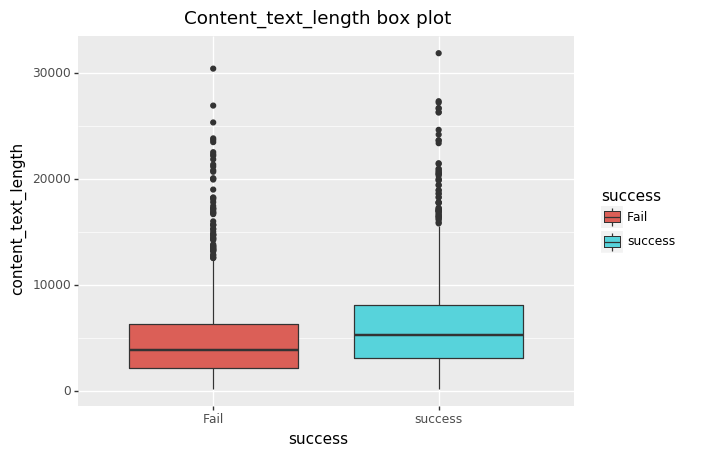

<ggplot: (284551344)>

In [26]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='content_text_length')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Content_text_length box plot')

<Figure size 432x288 with 0 Axes>

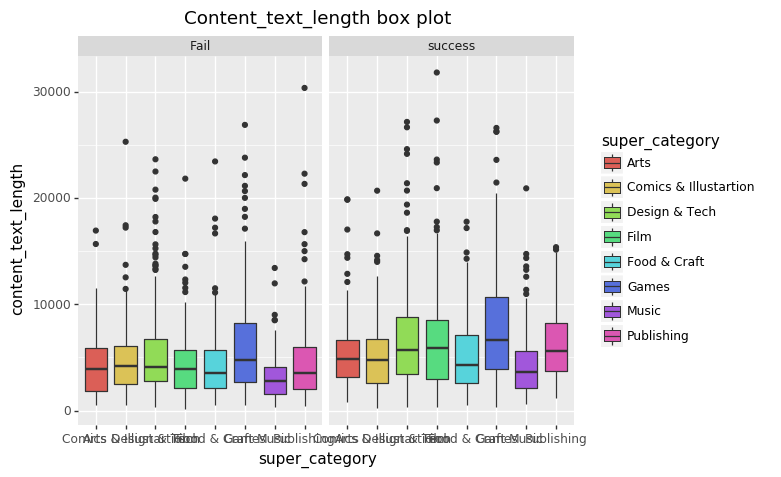

<ggplot: (284552624)>

In [27]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='content_text_length')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Content_text_length box plot') \
    + facet_wrap('~success')

In [28]:
df.groupby(['success'])['update_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,1230.0,1.956911,3.658835,0.0,0.00,1.0,2.75,39.0
success,1266.0,5.394945,5.899590,0.0,1.25,4.0,7.00,59.0


In [29]:
T_test.T_test(df,'success','update_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=136.62719324981833, pvalue=9.088826142321564e-31)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=17.437939641494232, pvalue=2.3929002888131995e-64)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

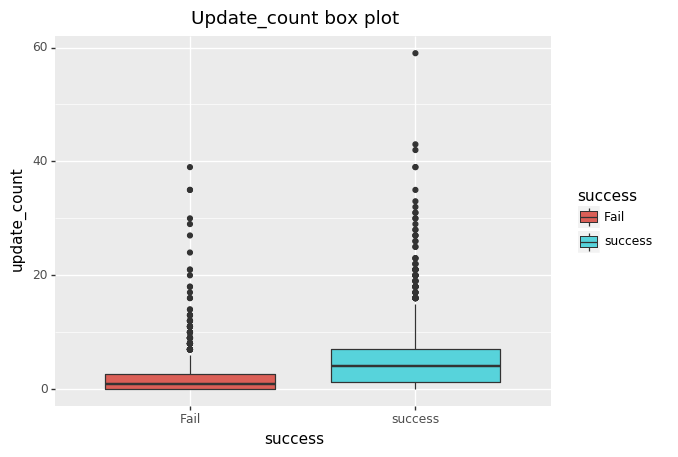

<ggplot: (7533120874)>

In [30]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='update_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Update_count box plot')

<Figure size 432x288 with 0 Axes>

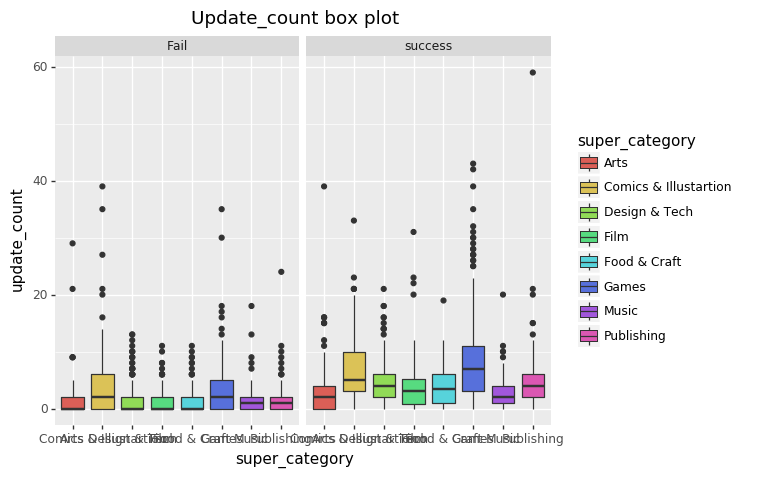

<ggplot: (7533128603)>

In [31]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='update_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Update_count box plot') \
    + facet_wrap('~success')

#### Categorical
1.	Topic of the project and it's category

<Figure size 72x576 with 0 Axes>

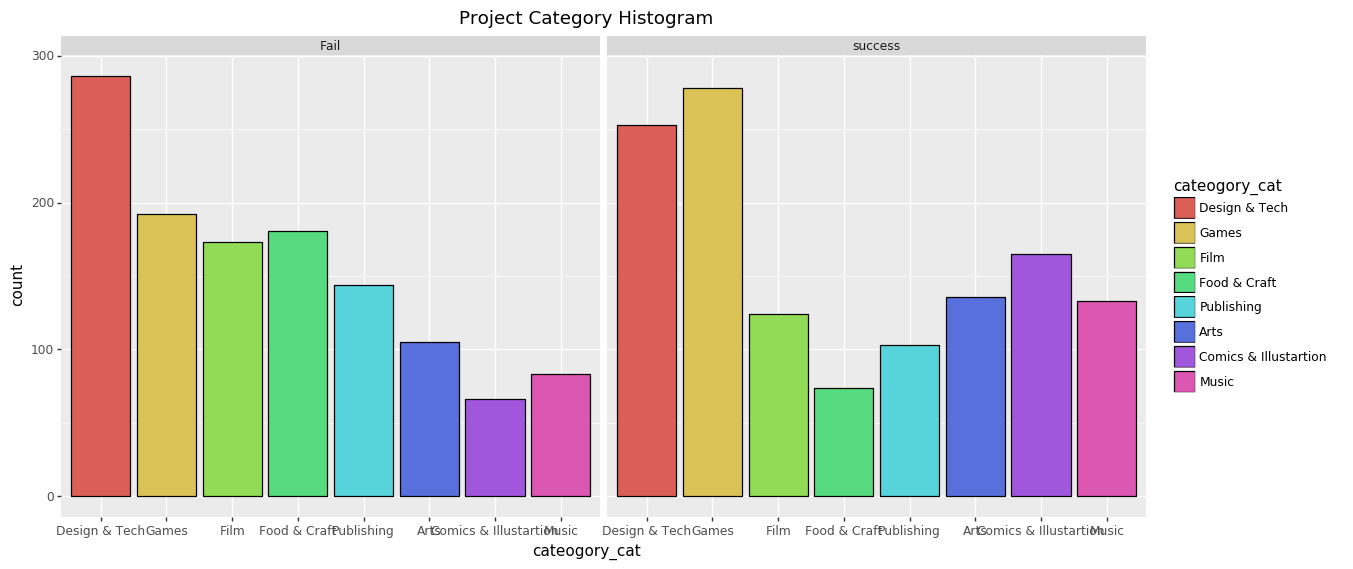

<ggplot: (7533488567)>

In [32]:
# Determine order and create a categorical type
cateogory_list = df['super_category'].value_counts().index.tolist()
cateogory_cat = CategoricalDtype(categories=cateogory_list, ordered=True)
df['cateogory_cat'] = df['super_category'].astype(str).astype(cateogory_cat)

plt.rcParams['figure.figsize'] = [1, 8]
fig = plt.figure()


# graph 객체 생성
com_plot = ggplot(df, aes('cateogory_cat',fill='cateogory_cat')) \
    + geom_bar(colour="black") \
    + ggtitle('Project Category Histogram') \
    + theme(figure_size=(14, 6))\
    + facet_wrap('~success')
com_plot

In [33]:
pd.DataFrame(df.groupby(['cateogory_cat','success'])['cateogory_cat'].count())

cateogory_cat
cateogory_cat         success               
Design & Tech         Fail               286
                      success            253
Games                 Fail               192
                      success            278
Film                  Fail               173
                      success            124
Food & Craft          Fail               181
                      success             74
Publishing            Fail               144
                      success            103
Arts                  Fail               105
                      success            136
Comics & Illustartion Fail                66
                      success            165
Music                 Fail                83
                      success            133

#### From project creators
Number of 
1.	Projects created
2.	Projects backed by the creator


In [34]:
df.groupby(['success'])['created_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,1230.0,1.521951,1.684879,1.0,1.0,1.0,1.0,19.0
success,1266.0,3.281201,5.508878,1.0,1.0,1.0,3.0,51.0


In [36]:
T_test.T_test(df,'success','created_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=114.98767340491005, pvalue=2.930337031755498e-26)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=10.723230548902231, pvalue=2.9303370317582577e-26)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


<Figure size 72x576 with 0 Axes>

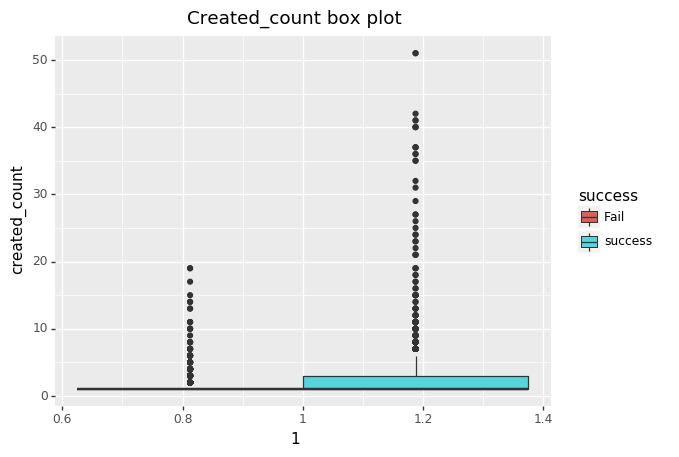

<ggplot: (7533905244)>

In [37]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x=1, y='created_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Created_count box plot')

<Figure size 72x576 with 0 Axes>

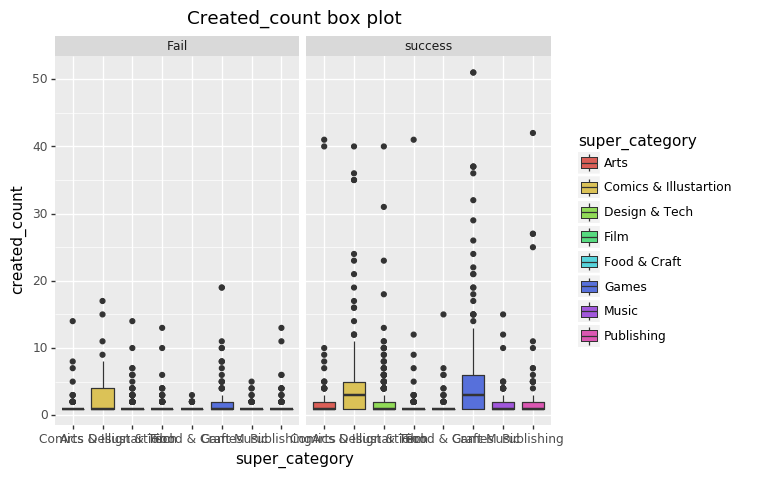

<ggplot: (-9223372029321302689)>

In [38]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='created_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Created_count box plot') \
    + facet_wrap('~success')

In [39]:
df['backed_count'] = df['backed_count'].apply(lambda x : 0 if x =='None' else x)
df['backed_count'] = df['backed_count'].apply(lambda x : float(x))

df.groupby(['success'])['backed_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,1230.0,2.386992,14.515102,0.0,0.0,0.0,0.0,195.0
success,1266.0,8.490521,28.931627,0.0,0.0,0.0,2.0,380.0


In [40]:
T_test.T_test(df,'success','backed_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=43.98519369612661, pvalue=4.042626190955786e-11)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=6.63213341965665, pvalue=4.042626190959975e-11)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


<Figure size 72x576 with 0 Axes>

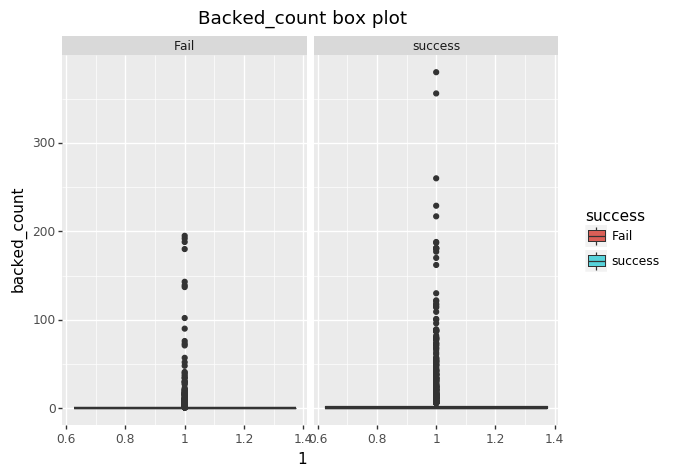

<ggplot: (283349291)>

In [41]:
df['backed_count'] = df['backed_count'].apply(lambda x : 0 if x =='None' else x)
df['backed_count'] = df['backed_count'].apply(lambda x : float(x))
# outlier 제거
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x=1, y='backed_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Backed_count box plot') \
    + facet_wrap('~success')

<Figure size 72x576 with 0 Axes>

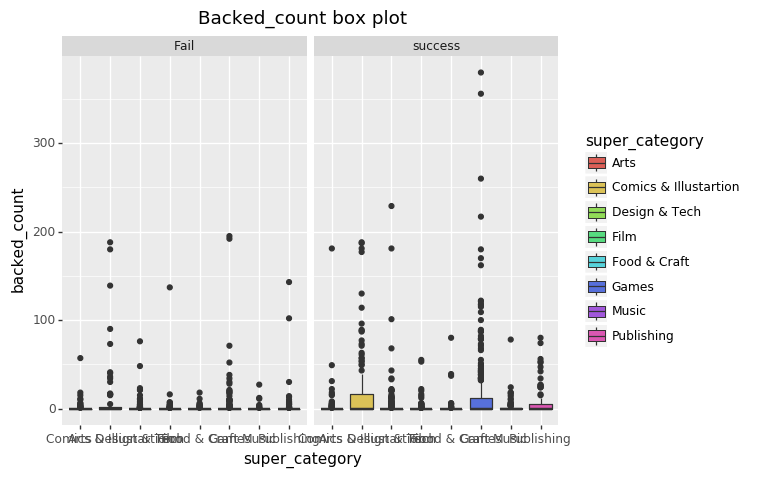

<ggplot: (283349501)>

In [42]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='backed_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Backed_count box plot') \
    + facet_wrap('~success')

#### Temporal
The accumulation over the first three days in terms of 
1.	The number of backers
2.	The funding amount

In [44]:
df_1 = df[['success','backer1']]
df_1['back_variable'] = '1backer'
df_1.rename(columns={'Success':'success','backer1':'backer','back_variable':'variable'},inplace=True)

df_2 = df[['success','backer2']]
df_2['back_variable'] = '2backer'
df_2.rename(columns={'Success':'success','backer2':'backer','back_variable':'variable'},inplace=True)

df_3 = df[['success','backer3']]
df_3['back_variable'] = '3backer'
df_3.rename(columns={'Success':'success','backer3':'backer','back_variable':'variable'},inplace=True)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [45]:
back_concat_df = pd.concat([df_1,df_2,df_3])

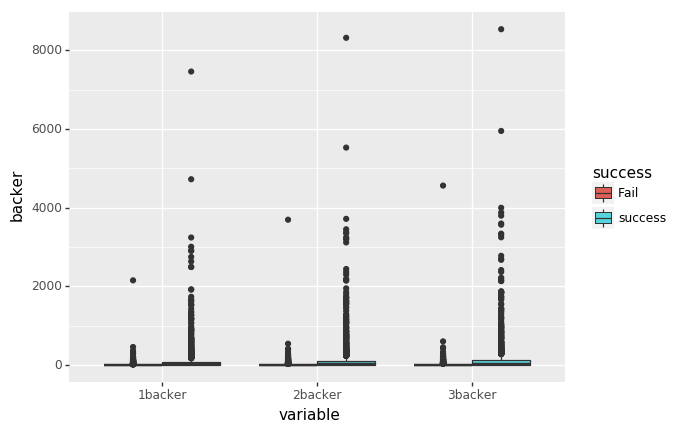

<ggplot: (-9223372036571847413)>

In [46]:
ggplot(back_concat_df, aes(x='variable',y='backer')) \
    + geom_boxplot(aes(fill='success'))

In [47]:
df_1 = df[['success','ratio1']]
df_1['variable'] = '1day'
df_1.rename(columns={'success':'success','ratio1':'ratio','variable':'variable'},inplace=True)

df_2 = df[['success','ratio2']]
df_2['variable'] = '2day'
df_2.rename(columns={'success':'success','ratio2':'ratio','variable':'variable'},inplace=True)

df_3 = df[['success','ratio3']]
df_3['variable'] = '3day'
df_3.rename(columns={'success':'success','ratio3':'ratio','variable':'variable'},inplace=True)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [48]:
filter_df1 = filter_outlier(df_1,'ratio')
filter_df2 = filter_outlier(df_2,'ratio')
filter_df3 = filter_outlier(df_3,'ratio')

Number of filtered value : 2186, Removed number of value : 310
Number of filtered value : 2183, Removed number of value : 313
Number of filtered value : 2181, Removed number of value : 315


In [49]:
concat_df = pd.concat([filter_df1,filter_df2,filter_df3])

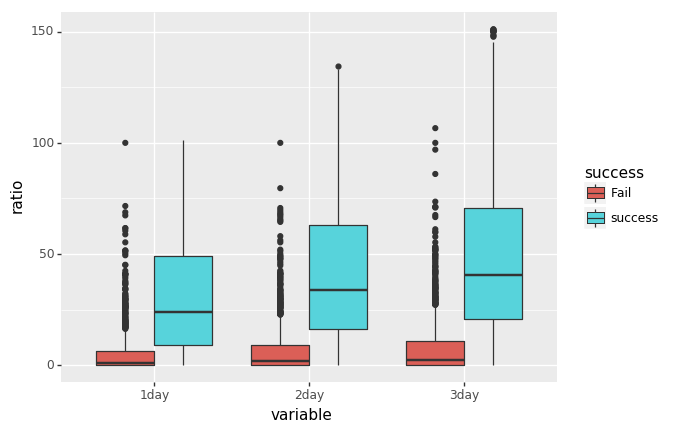

<ggplot: (-9223372036570467184)>

In [51]:
ggplot(concat_df, aes(x='variable',y='ratio')) \
    + geom_boxplot(aes(fill='success'))